In [7]:
#Import Libraries
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Read In Data
raw_data = pd.read_csv('FIFA_RAW.csv')
#Data Cleaning
cleaned_data = raw_data.dropna(subset=['Position',"Height"]) 
cleaner_data = cleaned_data.drop(cleaned_data[cleaned_data['Position']=="GK"].index)
#Create relevant column
cleaner_data["Position Score"]=[row[row.Position] for _,row in cleaner_data.iterrows()]
cleaner_data.head()

FileNotFoundError: File b'FIFA_RAW.csv' does not exist

In [9]:
#View List Of Positions
position_list = raw_data["Position"].unique()
position_list


NameError: name 'raw_data' is not defined

In [ ]:
#Select Relevant Data
narrowed_data = cleaner_data[["Name","Position","Position Score","Height"]]
narrowed_data_filtered = narrowed_data.loc[narrowed_data["Position"].isin(["RCB","CB","LCB","LB","RB","RWB","LWB"])]
narrowed_data_filtered.head()


In [ ]:

# new data frame with split value columns 
new_score = narrowed_data_filtered["Position Score"].str.split("+", n = 1, expand = True) 

# making new Position Score column from new data frame 
narrowed_data_filtered["New Score"]= new_score[0] 
 
# Dropping old Position Score column
narrowed_data_filtered.drop(columns =["Position Score"], inplace = True) 

narrowed_data_filtered.head()


In [3]:
new_height = narrowed_data_filtered["Height"].str.split("'", n = 1, expand = True) 
narrowed_data_filtered["Feet"]= new_height[0] 
narrowed_data_filtered["Inches"]= new_height[1]    
narrowed_data_filtered.drop(columns =["Height"], inplace = True) 
narrowed_data_filtered.head()

NameError: name 'narrowed_data_filtered' is not defined

In [4]:
#Cast feet and inches columns as integers
narrowed_data_filtered[['Feet', 'Inches']] = narrowed_data_filtered[['Feet', 'Inches']].astype(int)
#multiple feet by 12 and add to inches for one new height column (in inches)
narrowed_data_filtered["New Feet"] = [row * 12 for row in narrowed_data_filtered["Feet"]]
narrowed_data_filtered["New Height"] = narrowed_data_filtered["New Feet"] + narrowed_data_filtered["Inches"]


NameError: name 'narrowed_data_filtered' is not defined

In [5]:
narrowed_data_filtered.head()




NameError: name 'narrowed_data_filtered' is not defined

In [6]:
#drop old columns
narrowed_data_filtered.drop(columns =["New Feet","Feet","Inches"], inplace = True) 

NameError: name 'narrowed_data_filtered' is not defined

In [10]:
narrowed_data_filtered.head()

,Name,Position,New Score,New Height
8,Sergio Ramos,RCB,87,72
12,D. Godín,CB,87,74
24,G. Chiellini,LCB,86,74
34,M. Hummels,LCB,85,75
35,Marcelo,LB,84,69


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


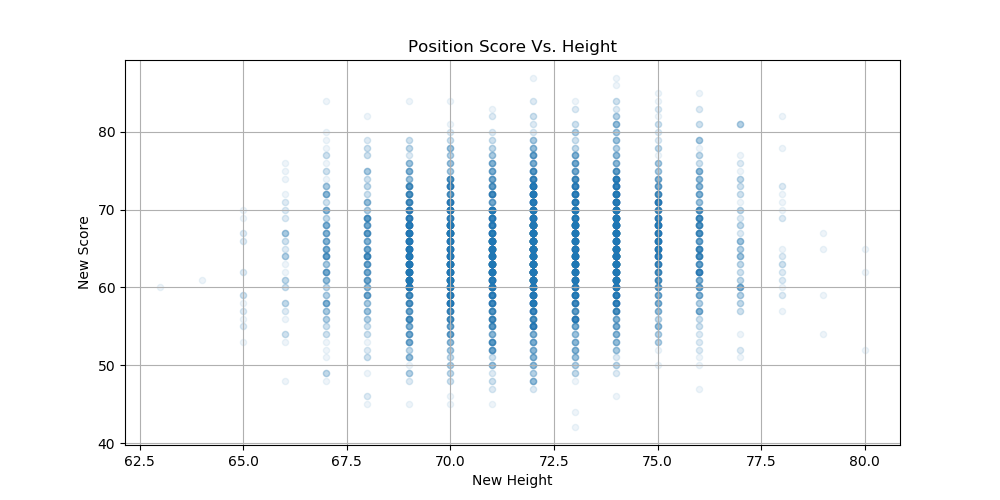

In [11]:
# Create a scatter plot which compares MPG to horsepower
narrowed_data_filtered["New Score"] = pd.to_numeric(narrowed_data_filtered['New Score'])
narrowed_data_filtered["New Height"] = pd.to_numeric(narrowed_data_filtered["New Height"])

narrowed_data_filtered.plot(kind="scatter", x="New Height", y="New Score", grid=True,
              title="Position Score Vs. Height",alpha=.075,figsize=(10,5))


plt.show()